<a href="https://colab.research.google.com/github/tapasyadimree/stockForecasting/blob/main/minorprojectLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from numpy import log
from numpy import array

import math
from decimal import Decimal
from math import floor,ceil,sqrt

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

load apple stock price data

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Apple.csv')
dataset.head()

,Open,High,Low,Close,Adj Close,Volume,Date
0,0.936384,1.004464,0.907924,0.999442,0.850643,535796800,2000-01-03
1,0.966518,0.987723,0.903460,0.915179,0.778926,512377600,2000-01-04
2,0.926339,0.987165,0.919643,0.928571,0.790324,778321600,2000-01-05
3,0.947545,0.955357,0.848214,0.848214,0.721931,767972800,2000-01-06
4,0.861607,0.901786,0.852679,0.888393,0.756127,460734400,2000-01-07


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5839 entries, 0 to 5838
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5839 non-null   float64
 1   High       5839 non-null   float64
 2   Low        5839 non-null   float64
 3   Close      5839 non-null   float64
 4   Adj Close  5839 non-null   float64
 5   Volume     5839 non-null   int64  
 6   Date       5839 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 319.4+ KB


In [ ]:
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5839.000000,5839.000000,5839.000000,5839.000000,5839.000000,5.839000e+03
mean,30.964461,31.318350,30.619127,30.982545,29.763246,4.112873e+08
std,44.291183,44.842037,43.768914,44.328922,44.158932,3.867277e+08
min,0.231964,0.235536,0.227143,0.234286,0.199405,3.519590e+07
25%,1.931965,1.955714,1.897143,1.925714,1.639011,1.384356e+08
50%,13.321429,13.523214,13.160357,13.358929,11.370029,2.942240e+08
75%,36.438751,36.795000,36.237501,36.577499,34.384544,5.476394e+08
max,182.630005,182.940002,179.119995,182.009995,180.683868,7.421641e+09


Checking for any null values present in the dataset

In [ ]:
dataset.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Date         0
dtype: int64

Plotting Few price data

In [ ]:
start_date = pd.to_datetime(dataset.Date[0])
end_date = pd.to_datetime(dataset.Date.values[-1])
dataset['Date'] = pd.to_datetime(dataset['Date'])

In [ ]:
dataset.tail()

,Open,High,Low,Close,Adj Close,Volume,Date
5834,147.809998,153.139999,147.699997,150.470001,150.470001,84457100,2023-03-13
5835,151.279999,153.399994,150.100006,152.589996,152.589996,73695900,2023-03-14
5836,151.190002,153.250000,149.919998,152.990005,152.990005,77167900,2023-03-15
5837,152.160004,156.460007,151.639999,155.850006,155.850006,76161100,2023-03-16
5838,156.080002,156.740005,154.279999,155.000000,155.000000,98862500,2023-03-17


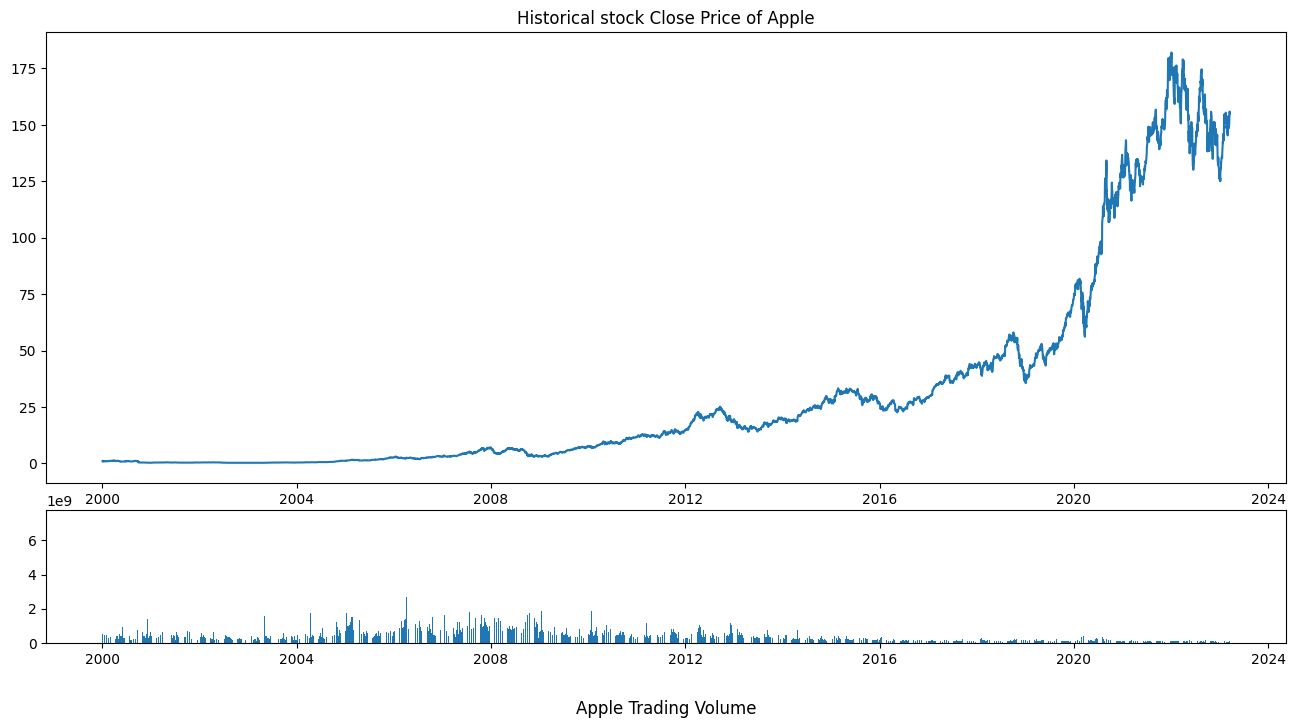

In [ ]:
top_plt = plt.subplot2grid((5,4), (0, 0), rowspan = 3, colspan = 4)
top_plt.plot(dataset.Date, dataset["Close"])
plt.title('Historical stock Close Price of Apple')
bottom_plt = plt.subplot2grid((5,4), (3,0), rowspan = 1, colspan = 4)
bottom_plt.bar(dataset.Date, dataset['Volume'])
plt.title('\nApple Trading Volume', y = -0.60)
plt.gcf().set_size_inches(16,10)

Checking for Correlation

<Axes: >

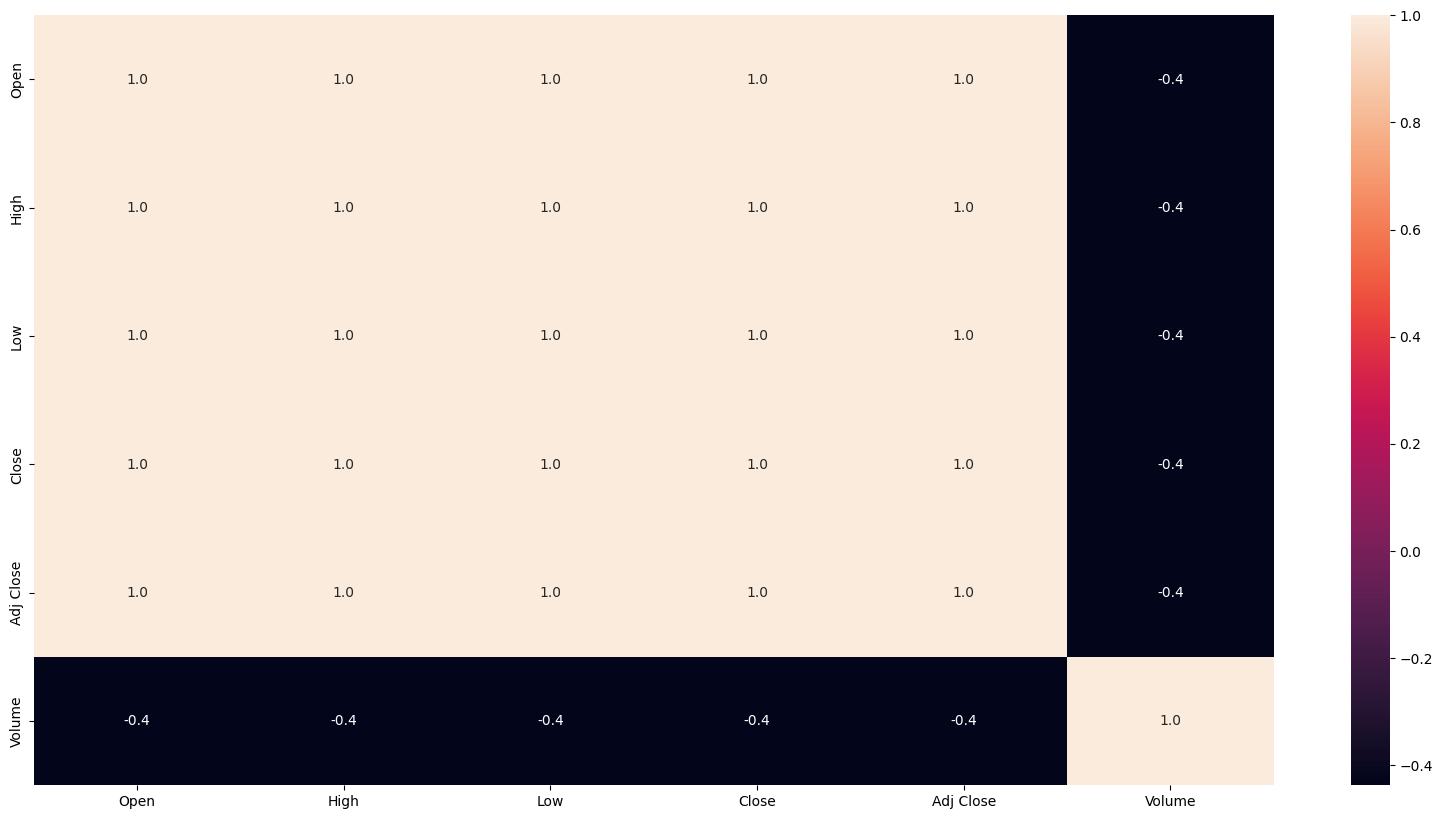

In [ ]:
# plotting correlation heatmap
sns.heatmap(dataset.corr(), annot = True, fmt = ".1f")

**Linear Regression**

In [ ]:
def linear_regression_prediction(df):
    shape=df.shape[0]
    df_new=df[['Close']]
    df_new.head()
    train_set=df_new.iloc[:ceil(shape*0.75)]
    valid_set=df_new.iloc[ceil(shape*0.75):]
    print('-----------------------------------------------------------------')
    print('-----------STOCK PRICE PREDICTION BY LINEAR REGRESSION-----------')
    print('-----------------------------------------------------------------')
    print('Shape of Training Set',train_set.shape)
    print('Shape of Validation Set',valid_set.shape)
    train=train_set.reset_index()
    valid=valid_set.reset_index()
    x_train = train['Date'].map(dt.datetime.toordinal)
    y_train = train[['Close']]
    x_valid = valid['Date'].map(dt.datetime.toordinal)
    y_valid = valid[['Close']]
    #implement linear regression
    model = LinearRegression()
    model.fit(np.array(x_train).reshape(-1,1),y_train)
    preds = model.predict(np.array(x_valid).reshape(-1,1))
    rms=np.sqrt(np.mean(np.power((np.array(valid_set['Close'])-preds),2)))
    print('RMSE value on validation set:',rms)
    print('-----------------------------------------------------------')
    print('-----------------------------------------------------------')
    valid_set['Predictions'] = preds
    plt.plot(train_set['Close'])
    plt.plot(valid_set[['Close', 'Predictions']])
    plt.xlabel('Date',size=20)
    plt.ylabel('Stock Price',size=20)
    plt.title('Stock Price Prediction by Linear Regression',size=20)
    plt.legend(['Model Training Data','Actual Data','Predicted Data'])

In [ ]:
dataset['Date'] = pd.to_datetime(dataset.Date,format='%m/%d/%Y %H:%M:%S')
dataset.index = dataset['Date']

-----------------------------------------------------------------
-----------STOCK PRICE PREDICTION BY LINEAR REGRESSION-----------
-----------------------------------------------------------------
Shape of Training Set (4380, 1)
Shape of Validation Set (1459, 1)
RMSE value on validation set: 77.7540160035934
-----------------------------------------------------------
-----------------------------------------------------------


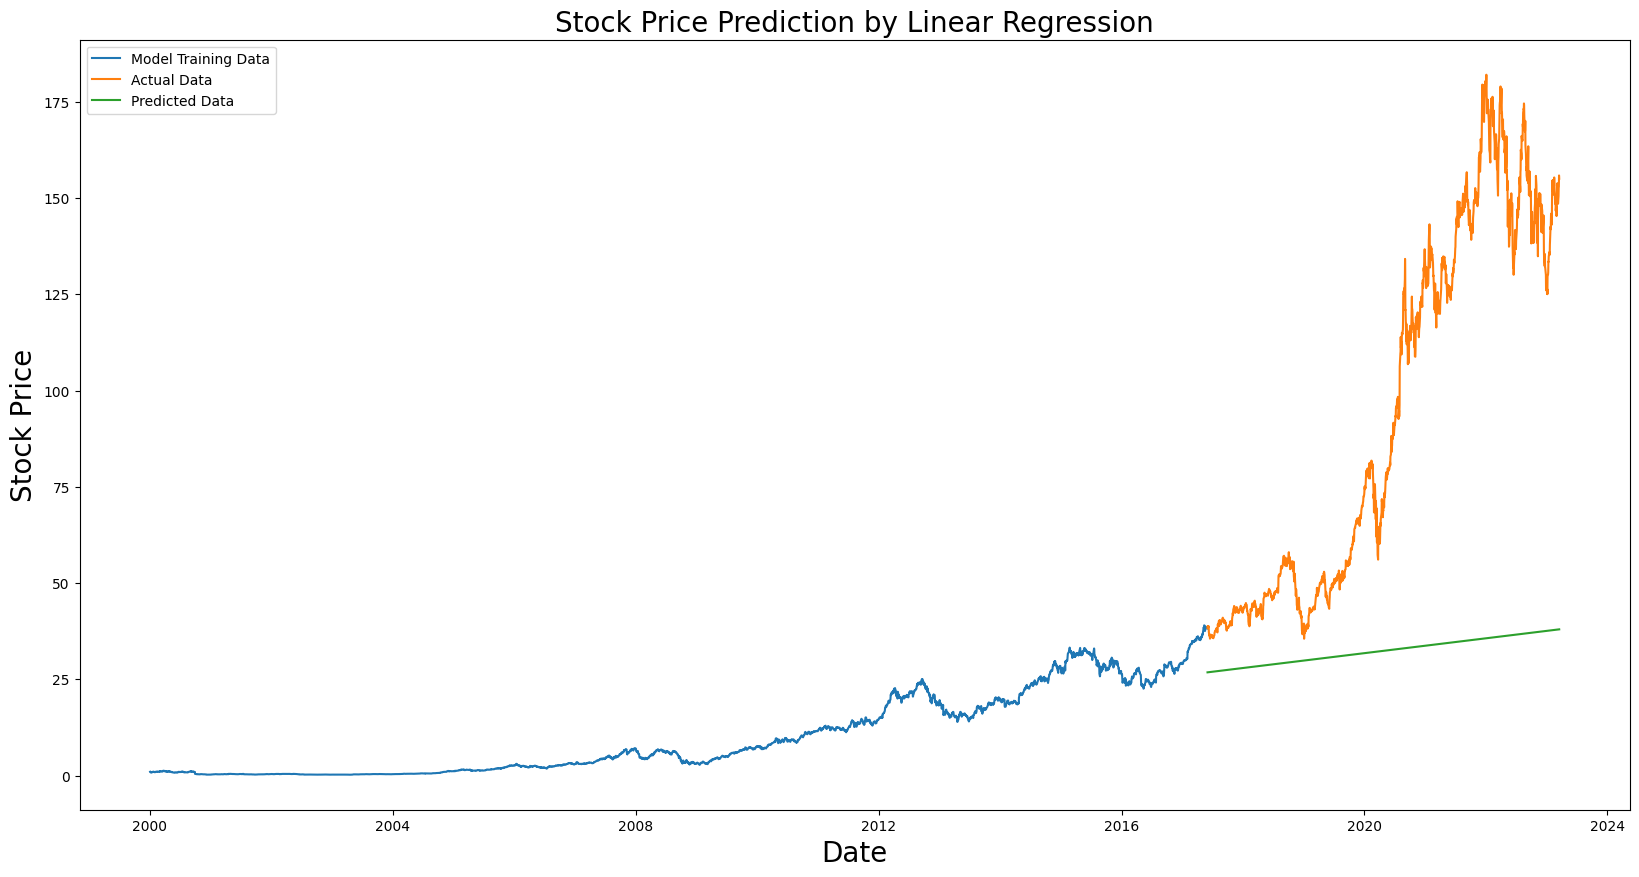

In [ ]:
linear_regression_prediction(dataset)